<a href="https://colab.research.google.com/github/GZabalaG/AIMaster/blob/main/Datasets_Analysis/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cars

### Imports...

In [82]:
!pip install dython

In [83]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
from google.colab import drive
from matplotlib import pyplot as plt
import seaborn as sns
from dython import nominal
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [84]:
drive.mount('/content/gdrive')

os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive"

%cd /content

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


In [85]:
!kaggle datasets download adityadesai13/used-car-dataset-ford-and-mercedes

used-car-dataset-ford-and-mercedes.zip: Skipping, found more recently modified local copy (use --force to force download)


In [86]:
with ZipFile('used-car-dataset-ford-and-mercedes.zip', 'r') as zipObj:
   zipObj.extractall()

In [87]:
audi = pd.read_csv('audi.csv')
bmw = pd.read_csv('bmw.csv')
ford = pd.read_csv('ford.csv')
hyundi = pd.read_csv('hyundi.csv')
mercedes = pd.read_csv('merc.csv')
skoda = pd.read_csv('skoda.csv')
toyota = pd.read_csv('toyota.csv')
vw = pd.read_csv('vw.csv')

cars = {
    'Audi':audi,
    'BMW':bmw,
    'Ford':ford,
    'Hyundi':hyundi,
    'Mercedes':mercedes,
    'Skoda':skoda,
    'Toyota':toyota,
    'VW':vw
}

In [88]:
for k, v in cars.items():
  print('\n', k, '\n\n')
  display(v)


 Audi 




,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4



 BMW 




,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0



 Ford 




,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6



 Hyundi 




,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6



 Mercedes 




,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0



 Skoda 




,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5
...,...,...,...,...,...,...,...,...,...
6262,Yeti,2014,11440,Semi-Auto,14569,Petrol,160,44.8,1.2
6263,Octavia,2014,10990,Semi-Auto,49999,Petrol,30,56.5,1.4
6264,Fabia,2017,9500,Semi-Auto,17131,Petrol,145,61.4,1.0
6265,Citigo,2016,5999,Manual,21747,Petrol,20,62.8,1.0



 Toyota 




,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3



 VW 




,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


## Datasets information

In [89]:
for k, v in cars.items():
  print('\n', k, '\n\n')
  display(v.describe())


 Audi 




,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000



 BMW 




,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000



 Ford 




,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000



 Hyundi 




,year,price,mileage,tax(£),mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000



 Mercedes 




,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000



 Skoda 




,year,price,mileage,tax,mpg,engineSize
count,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,2017.502314,14275.449338,20118.452050,117.407053,56.589165,1.433509
std,1.734754,6332.051106,19955.410762,53.267949,12.037576,0.394800
min,2004.000000,995.000000,5.000000,0.000000,30.100000,0.000000
25%,2017.000000,9495.000000,5812.500000,125.000000,50.400000,1.000000
50%,2018.000000,12998.000000,14653.000000,145.000000,57.700000,1.400000
75%,2019.000000,17990.000000,28000.000000,145.000000,62.800000,2.000000
max,2020.000000,91874.000000,300000.000000,325.000000,201.800000,2.500000



 Toyota 




,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000



 VW 




,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


In [90]:
for k, v in cars.items():
  print('\n', k, '\n\n')
  display(v.isnull().sum())


 Audi 




model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


 BMW 




model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


 Ford 




model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


 Hyundi 




model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax(£)          0
mpg             0
engineSize      0
dtype: int64


 Mercedes 




model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


 Skoda 




model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


 Toyota 




model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


 VW 




model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [91]:
for k, v in cars.items():
  print('\n', k, '\n\n')
  display(v.dtypes)


 Audi 




model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


 BMW 




model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


 Ford 




model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


 Hyundi 




model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax(£)            int64
mpg             float64
engineSize      float64
dtype: object


 Mercedes 




model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


 Skoda 




model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


 Toyota 




model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


 VW 




model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [92]:
for k, v in cars.items():
    print('\n', k)
    display(v.nunique())


 Audi


model             26
year              21
price           3260
transmission       3
mileage         7725
fuelType           3
tax               37
mpg              104
engineSize        19
dtype: int64


 BMW


model             24
year              25
price           3777
transmission       3
mileage         8086
fuelType           5
tax               38
mpg              102
engineSize        17
dtype: int64


 Ford


model              23
year               23
price            3511
transmission        3
mileage         13528
fuelType            5
tax                35
mpg                90
engineSize         16
dtype: int64


 Hyundi


model             16
year              19
price           1685
transmission       4
mileage         4062
fuelType           4
tax(£)            24
mpg               60
engineSize        13
dtype: int64


 Mercedes


model             27
year              25
price           4424
transmission       4
mileage         9716
fuelType           4
tax               40
mpg              120
engineSize        26
dtype: int64


 Skoda


model             12
year              17
price           1906
transmission       4
mileage         5032
fuelType           4
tax               19
mpg               63
engineSize        10
dtype: int64


 Toyota


model             18
year              23
price           2114
transmission       4
mileage         5699
fuelType           4
tax               29
mpg               81
engineSize        16
dtype: int64


 VW


model              27
year               21
price            3970
transmission        3
mileage         10760
fuelType            4
tax                32
mpg                86
engineSize         12
dtype: int64

In [93]:
def difference (list1, list2):
   list_dif = [i for i in list1 + list2 if i not in list1 or i not in list2]
   return list_dif

In [94]:
# Check columns names
columns=set([])
dif_cols=set([])

for k, v in cars.items():
    print('\n', k)
    ref_columns = set(v.columns)
    if not columns:
      columns = ref_columns.copy()
    else:
      columns = set(set(columns).intersection(ref_columns))
      dif_cols = dif_cols.union(difference(list(columns), list(ref_columns)))
    display(v.columns)

print('\nSame column names', columns)
print('\nSame column names', dif_cols)


 Audi


Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


 BMW


Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


 Ford


Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


 Hyundi


Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'tax(£)', 'mpg', 'engineSize'],
      dtype='object')


 Mercedes


Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


 Skoda


Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


 Toyota


Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


 VW


Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


Same column names {'year', 'model', 'fuelType', 'transmission', 'price', 'engineSize', 'mpg', 'mileage'}

Same column names {'tax', 'tax(£)'}


Renaming Hyundi tax(£) column to tax

In [95]:
cars['Hyundi'] = cars['Hyundi'].rename(columns={'tax(£)': 'tax'})

In [96]:
cars['Hyundi'] 

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6


## Datasets processing

Joining dataframes with a new column named brand

In [97]:
for k, v in cars.items():
  v.insert(loc=0, column='Brand', value=str(k))

In [98]:
train = pd.concat(frame for frame in [*cars.values()]).reset_index(drop=True)

In [99]:
train

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
85550,VW,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
85551,VW,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
85552,VW,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
85553,VW,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


## Dataset visualization

### Price vs Categorical (Distributions)

In [100]:
sns.set_theme(style="darkgrid")

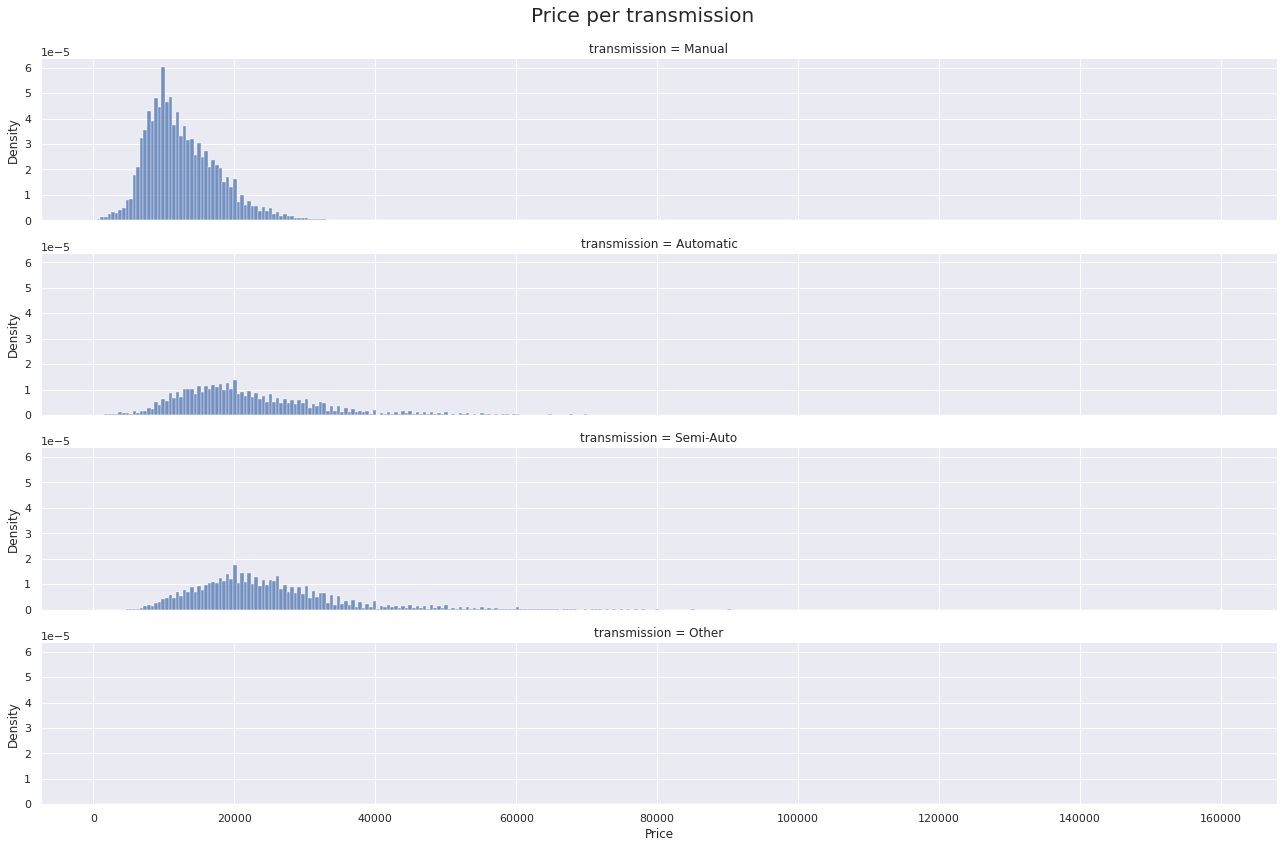

In [101]:
g = sns.displot(
    train, 
    x='price', 
    row='transmission',
    height=3,
    aspect=6,
    stat='density'
)

g.fig.suptitle('Price per transmission', fontsize=20)
plt.xlabel("Price")

g.fig.subplots_adjust(top=0.92)

plt.show()

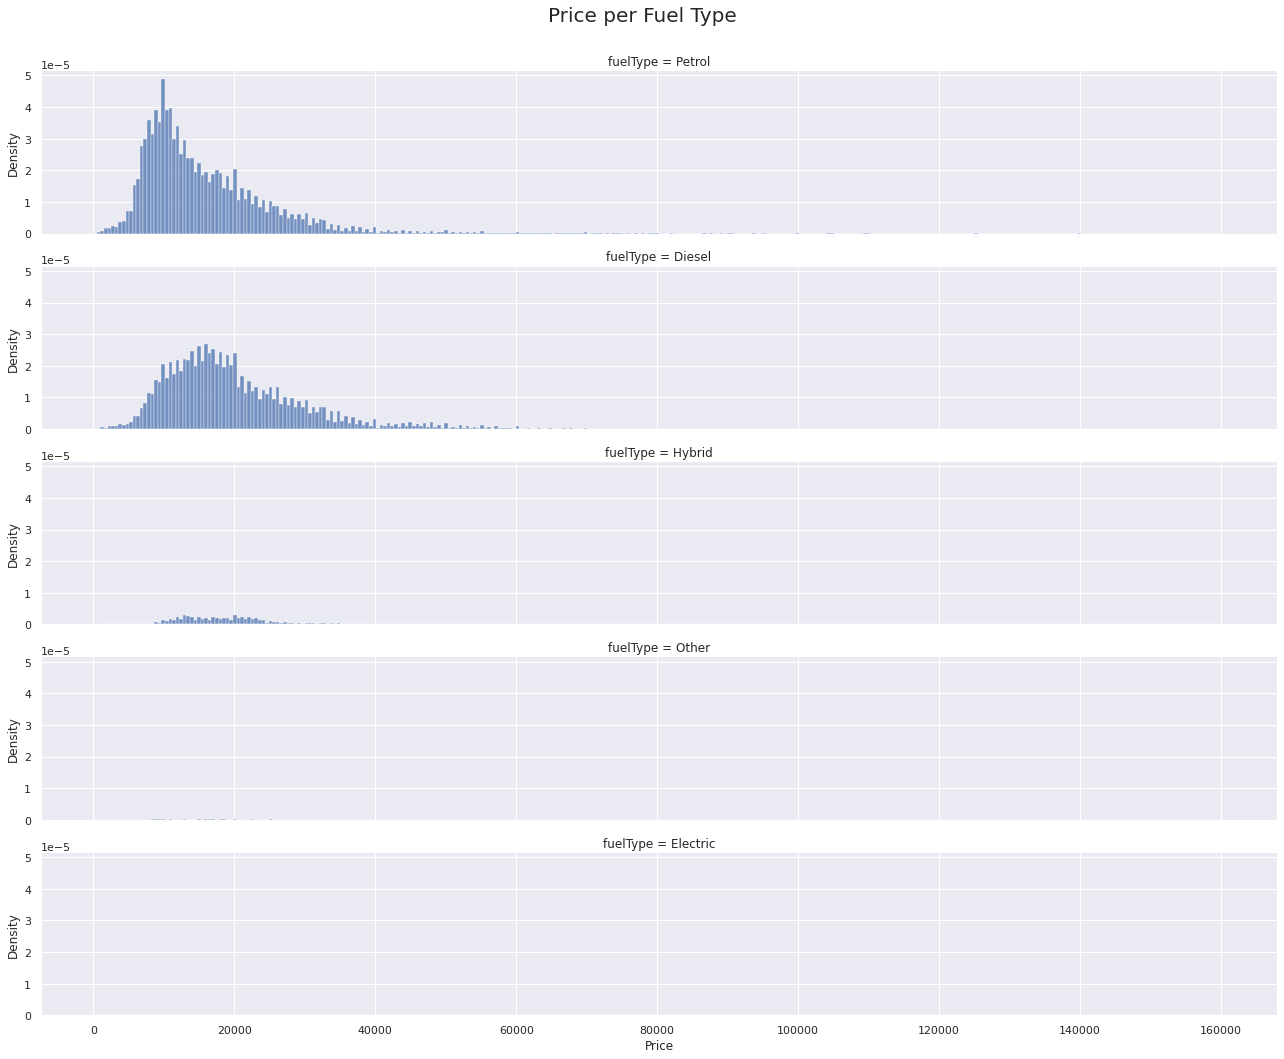

In [102]:
g = sns.displot(
    train, 
    x='price', 
    row='fuelType',
    height=3,
    aspect=6,
    stat='density'
)

g.fig.suptitle('Price per Fuel Type', fontsize=20)
plt.xlabel("Price")

g.fig.subplots_adjust(top=0.92)

plt.show()



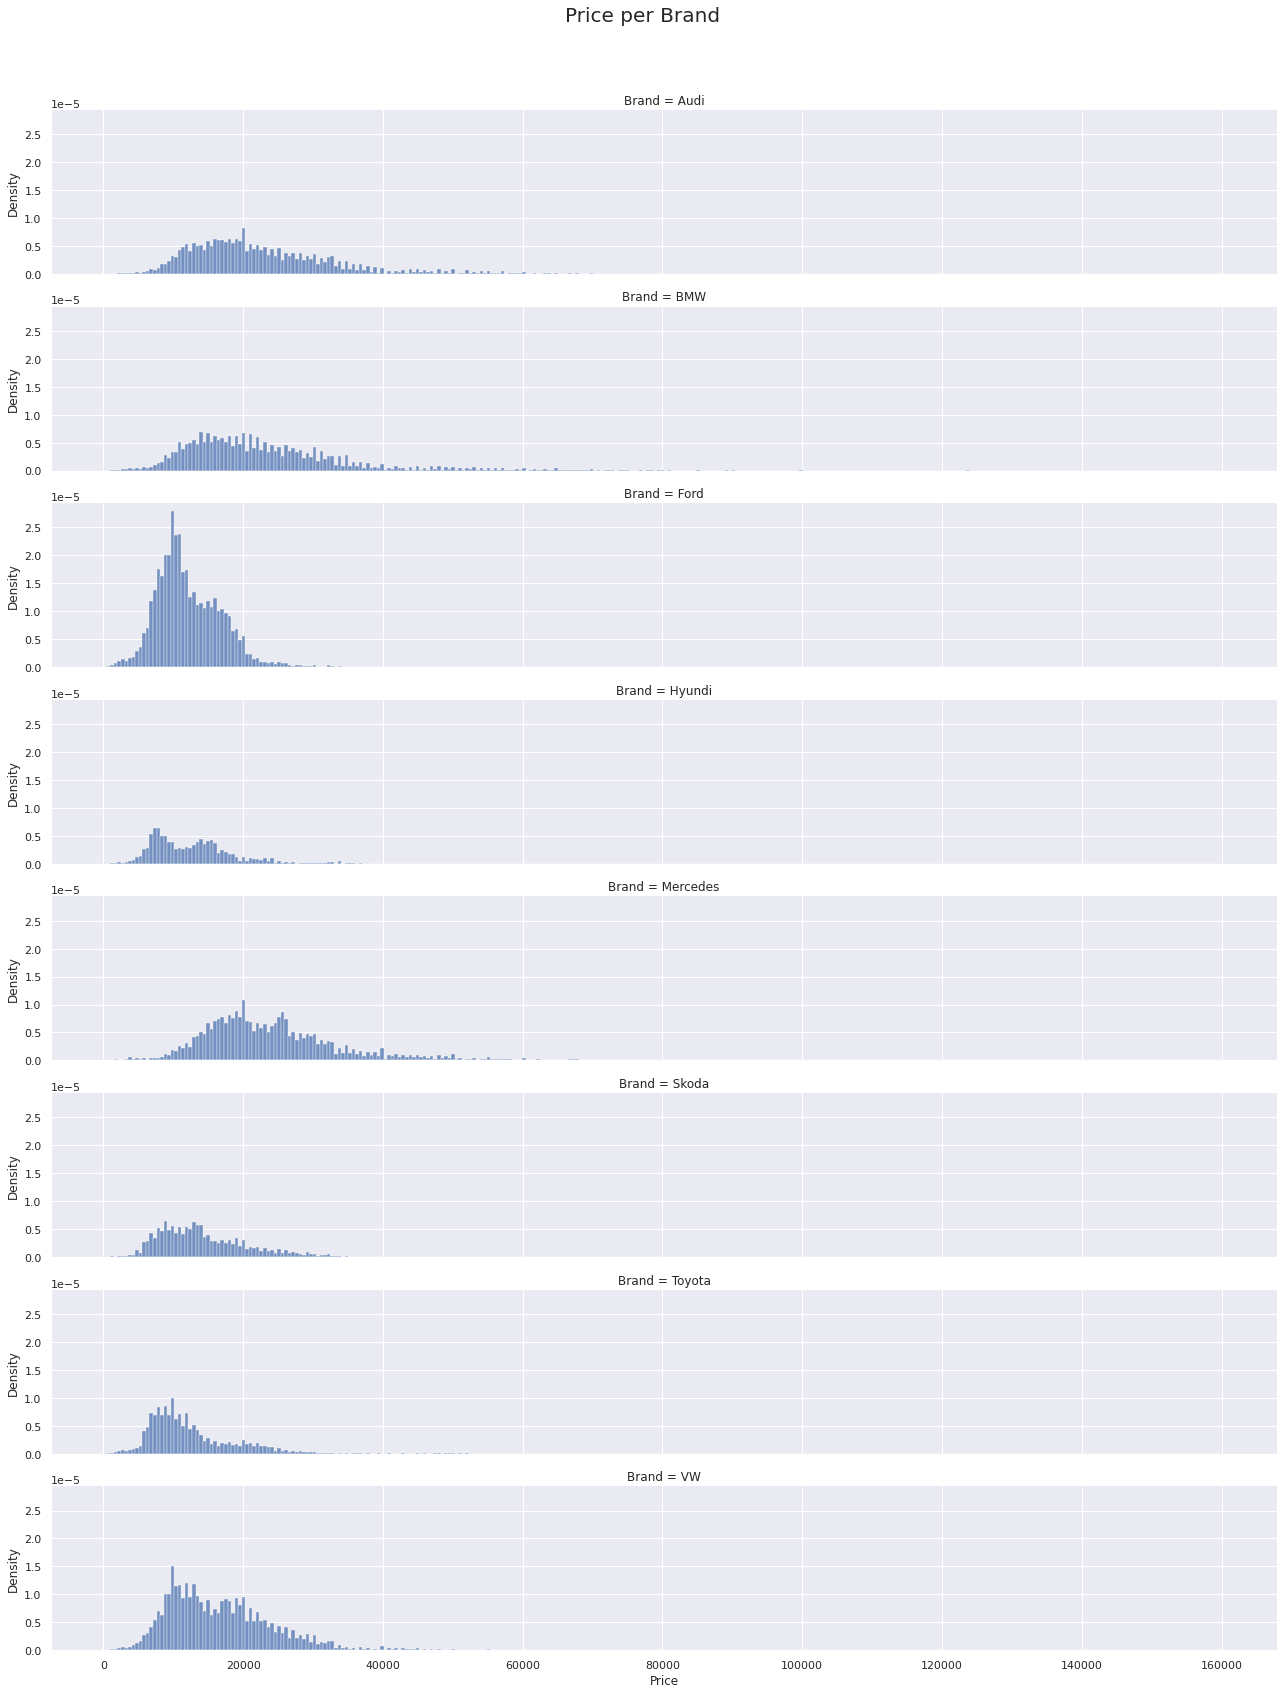

In [103]:
g = sns.displot(
    train, 
    x='price', 
    row='Brand',
    height=3,
    aspect=6,
    stat="density"
)

g.fig.suptitle('Price per Brand', fontsize=20)
plt.xlabel("Price")

g.fig.subplots_adjust(top=0.92)

plt.show()

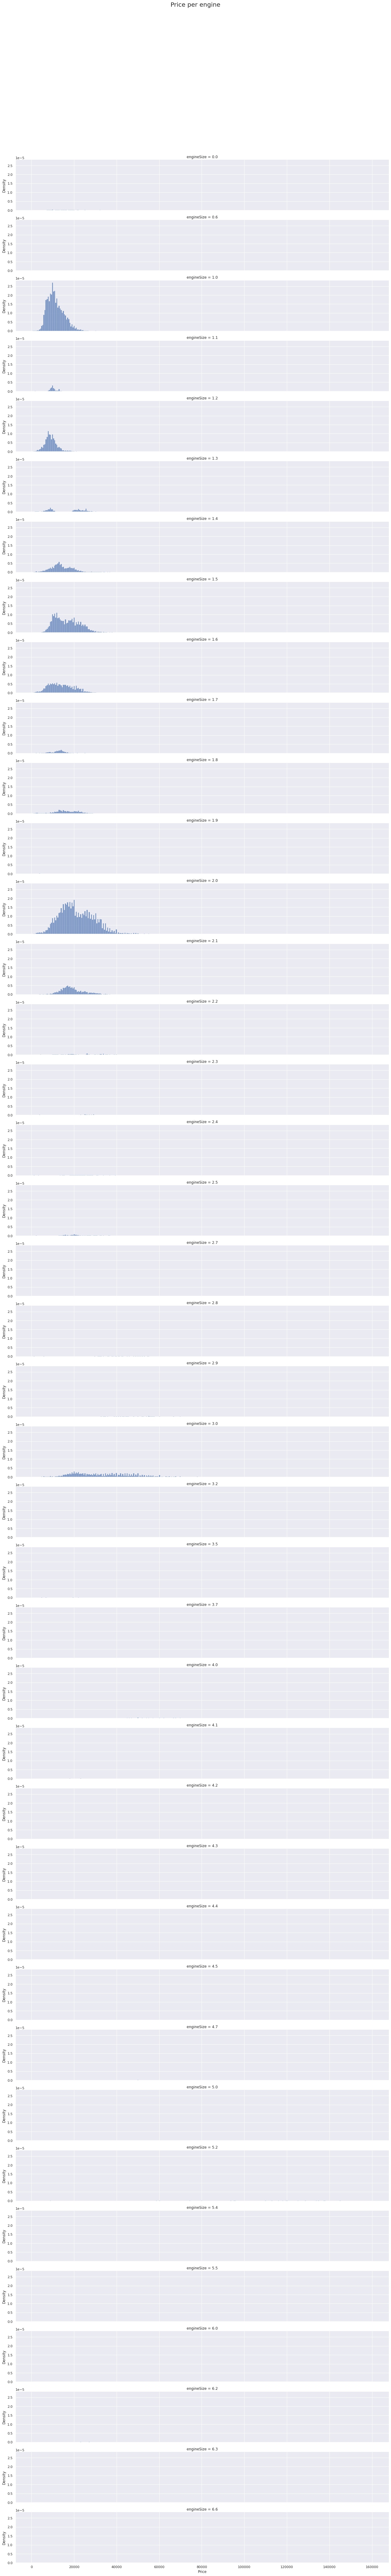

In [104]:
g = sns.displot(
    train, 
    x='price', 
    row='engineSize',
    height=3,
    aspect=6,
    stat="density"
)

g.fig.suptitle('Price per engine', fontsize=20)
plt.xlabel("Price")

g.fig.subplots_adjust(top=0.92)

plt.show()

### Regression plots. Price vs continous variables.

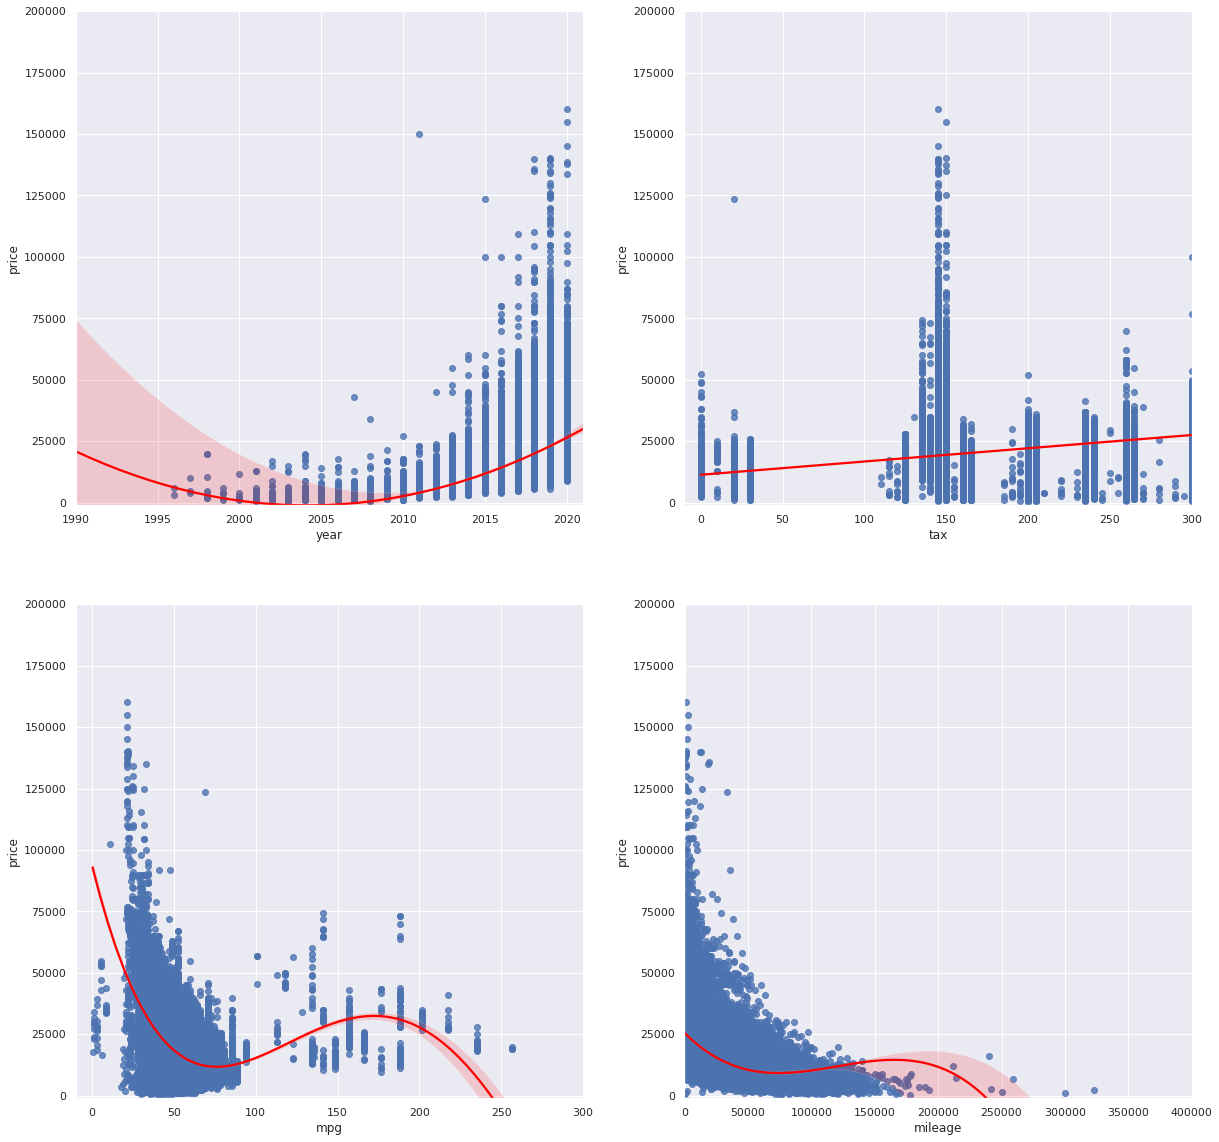

In [105]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

year_g = sns.regplot(
    data=train,
    x="year", 
    y="price",
    order=2, 
    line_kws={"color": "red"},
    ax=ax[0,0])

tax_g = sns.regplot(
    data=train,
    x="tax", 
    y="price",
    order=1, 
    line_kws={"color": "red"},
    ax=ax[0,1])

mpg_g = sns.regplot(
    data=train,
    x="mpg", 
    y="price",
    order=4, 
    line_kws={"color": "red"},
    ax=ax[1,0])

mileage_g = sns.regplot(
    data=train,
    x="mileage", 
    y="price",
    order=3, 
    line_kws={"color": "red"},
    ax=ax[1,1])

ax[0,0].set_xlim(1990, 2021)
ax[0,0].set_ylim(-1000, 200000)

ax[0,1].set_xlim(-10, 300)
ax[0,1].set_ylim(-1000, 200000)

ax[1,0].set_xlim(-10, 300)
ax[1,0].set_ylim(-1000, 200000)

ax[1,1].set_xlim(-100, 400000)
ax[1,1].set_ylim(-1000, 200000)

plt.show()

### Correlation

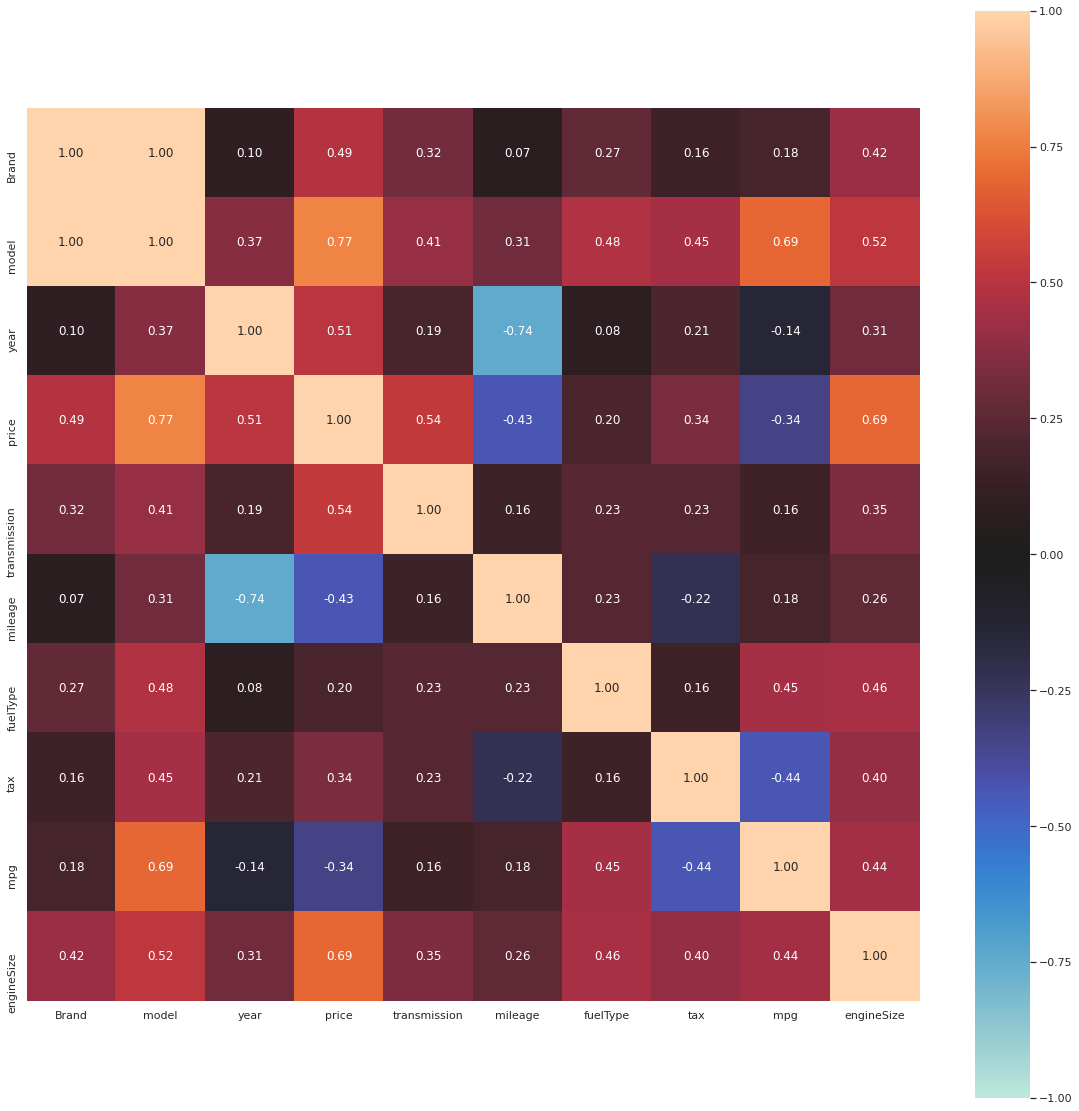

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff8e5202bd0>,
 'corr':                  Brand     model      year  ...       tax       mpg  engineSize
 Brand         1.000000  0.999035  0.097761  ...  0.159525  0.181412    0.416717
 model         0.999035  1.000000  0.367201  ...  0.452758  0.694627    0.517795
 year          0.097761  0.367201  1.000000  ...  0.208790 -0.137180    0.311023
 price         0.489226  0.770120  0.505424  ...  0.341742 -0.338206    0.691612
 transmission  0.317634  0.410352  0.190697  ...  0.231207  0.159406    0.345336
 mileage       0.070922  0.310795 -0.743540  ... -0.223493  0.182521    0.257885
 fuelType      0.272938  0.478241  0.084004  ...  0.157751  0.449847    0.456424
 tax           0.159525  0.452758  0.208790  ...  1.000000 -0.435436    0.402075
 mpg           0.181412  0.694627 -0.137180  ... -0.435436  1.000000    0.442283
 engineSize    0.416717  0.517795  0.311023  ...  0.402075  0.442283    1.000000
 
 [10 rows x 10 columns]}

In [106]:
nominal.associations(train, nominal_columns=['Brand', 'model', 'transmission', 'fuelType', 'engineSize'], figsize=(20,20))

## Predictions...

### Some preprocessing:
- Brand and model together
- Dummy variables
- Standarization

In [107]:
train["Brand_model"] = train["Brand"] + '_' + train["model"]
train = train.drop(['Brand', 'model'], axis=1)
train

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brand_model
0,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi_ A1
1,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi_ A6
2,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi_ A1
3,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi_ A4
4,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi_ A3
...,...,...,...,...,...,...,...,...,...
85550,2012,5990,Manual,74000,Diesel,125,58.9,2.0,VW_ Eos
85551,2008,1799,Manual,88102,Petrol,145,46.3,1.2,VW_ Fox
85552,2009,1590,Manual,70000,Petrol,200,42.0,1.4,VW_ Fox
85553,2006,1250,Manual,82704,Petrol,150,46.3,1.2,VW_ Fox


In [108]:
X = train.drop(['price'], axis=1)
y = train['price']
X

,year,transmission,mileage,fuelType,tax,mpg,engineSize,Brand_model
0,2017,Manual,15735,Petrol,150,55.4,1.4,Audi_ A1
1,2016,Automatic,36203,Diesel,20,64.2,2.0,Audi_ A6
2,2016,Manual,29946,Petrol,30,55.4,1.4,Audi_ A1
3,2017,Automatic,25952,Diesel,145,67.3,2.0,Audi_ A4
4,2019,Manual,1998,Petrol,145,49.6,1.0,Audi_ A3
...,...,...,...,...,...,...,...,...
85550,2012,Manual,74000,Diesel,125,58.9,2.0,VW_ Eos
85551,2008,Manual,88102,Petrol,145,46.3,1.2,VW_ Fox
85552,2009,Manual,70000,Petrol,200,42.0,1.4,VW_ Fox
85553,2006,Manual,82704,Petrol,150,46.3,1.2,VW_ Fox


In [109]:
X = pd.get_dummies(X, columns=['Brand_model', 'transmission', 'fuelType'])
X

,year,mileage,tax,mpg,engineSize,Brand_model_Audi_ A1,Brand_model_Audi_ A2,Brand_model_Audi_ A3,Brand_model_Audi_ A4,Brand_model_Audi_ A5,Brand_model_Audi_ A6,Brand_model_Audi_ A7,Brand_model_Audi_ A8,Brand_model_Audi_ Q2,Brand_model_Audi_ Q3,Brand_model_Audi_ Q5,Brand_model_Audi_ Q7,Brand_model_Audi_ Q8,Brand_model_Audi_ R8,Brand_model_Audi_ RS3,Brand_model_Audi_ RS4,Brand_model_Audi_ RS5,Brand_model_Audi_ RS6,Brand_model_Audi_ RS7,Brand_model_Audi_ S3,Brand_model_Audi_ S4,Brand_model_Audi_ S5,Brand_model_Audi_ S8,Brand_model_Audi_ SQ5,Brand_model_Audi_ SQ7,Brand_model_Audi_ TT,Brand_model_BMW_ 1 Series,Brand_model_BMW_ 2 Series,Brand_model_BMW_ 3 Series,Brand_model_BMW_ 4 Series,Brand_model_BMW_ 5 Series,Brand_model_BMW_ 6 Series,Brand_model_BMW_ 7 Series,Brand_model_BMW_ 8 Series,Brand_model_BMW_ M2,...,Brand_model_Toyota_ Urban Cruiser,Brand_model_Toyota_ Verso,Brand_model_Toyota_ Verso-S,Brand_model_Toyota_ Yaris,Brand_model_VW_ Amarok,Brand_model_VW_ Arteon,Brand_model_VW_ Beetle,Brand_model_VW_ CC,Brand_model_VW_ Caddy,Brand_model_VW_ Caddy Life,Brand_model_VW_ Caddy Maxi,Brand_model_VW_ Caddy Maxi Life,Brand_model_VW_ California,Brand_model_VW_ Caravelle,Brand_model_VW_ Eos,Brand_model_VW_ Fox,Brand_model_VW_ Golf,Brand_model_VW_ Golf SV,Brand_model_VW_ Jetta,Brand_model_VW_ Passat,Brand_model_VW_ Polo,Brand_model_VW_ Scirocco,Brand_model_VW_ Sharan,Brand_model_VW_ Shuttle,Brand_model_VW_ T-Cross,Brand_model_VW_ T-Roc,Brand_model_VW_ Tiguan,Brand_model_VW_ Tiguan Allspace,Brand_model_VW_ Touareg,Brand_model_VW_ Touran,Brand_model_VW_ Up,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15735,150,55.4,1.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2016,36203,20,64.2,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,2016,29946,30,55.4,1.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,2017,25952,145,67.3,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,2019,1998,145,49.6,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85550,2012,74000,125,58.9,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
85551,2008,88102,145,46.3,1.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
85552,2009,70000,200,42.0,1.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
85553,2006,82704,150,46.3,1.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [110]:
sc = StandardScaler()
X.iloc[:, 0:5] = sc.fit_transform(X.iloc[:, 0:5])
X

,year,mileage,tax,mpg,engineSize,Brand_model_Audi_ A1,Brand_model_Audi_ A2,Brand_model_Audi_ A3,Brand_model_Audi_ A4,Brand_model_Audi_ A5,Brand_model_Audi_ A6,Brand_model_Audi_ A7,Brand_model_Audi_ A8,Brand_model_Audi_ Q2,Brand_model_Audi_ Q3,Brand_model_Audi_ Q5,Brand_model_Audi_ Q7,Brand_model_Audi_ Q8,Brand_model_Audi_ R8,Brand_model_Audi_ RS3,Brand_model_Audi_ RS4,Brand_model_Audi_ RS5,Brand_model_Audi_ RS6,Brand_model_Audi_ RS7,Brand_model_Audi_ S3,Brand_model_Audi_ S4,Brand_model_Audi_ S5,Brand_model_Audi_ S8,Brand_model_Audi_ SQ5,Brand_model_Audi_ SQ7,Brand_model_Audi_ TT,Brand_model_BMW_ 1 Series,Brand_model_BMW_ 2 Series,Brand_model_BMW_ 3 Series,Brand_model_BMW_ 4 Series,Brand_model_BMW_ 5 Series,Brand_model_BMW_ 6 Series,Brand_model_BMW_ 7 Series,Brand_model_BMW_ 8 Series,Brand_model_BMW_ M2,...,Brand_model_Toyota_ Urban Cruiser,Brand_model_Toyota_ Verso,Brand_model_Toyota_ Verso-S,Brand_model_Toyota_ Yaris,Brand_model_VW_ Amarok,Brand_model_VW_ Arteon,Brand_model_VW_ Beetle,Brand_model_VW_ CC,Brand_model_VW_ Caddy,Brand_model_VW_ Caddy Life,Brand_model_VW_ Caddy Maxi,Brand_model_VW_ Caddy Maxi Life,Brand_model_VW_ California,Brand_model_VW_ Caravelle,Brand_model_VW_ Eos,Brand_model_VW_ Fox,Brand_model_VW_ Golf,Brand_model_VW_ Golf SV,Brand_model_VW_ Jetta,Brand_model_VW_ Passat,Brand_model_VW_ Polo,Brand_model_VW_ Scirocco,Brand_model_VW_ Sharan,Brand_model_VW_ Shuttle,Brand_model_VW_ T-Cross,Brand_model_VW_ T-Roc,Brand_model_VW_ Tiguan,Brand_model_VW_ Tiguan Allspace,Brand_model_VW_ Touareg,Brand_model_VW_ Touran,Brand_model_VW_ Up,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-0.050914,-0.340355,0.482102,-0.020518,-0.517336,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,-0.521019,0.620029,-1.536409,0.502066,0.508836,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,-0.521019,0.326443,-1.381139,-0.020518,-0.517336,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,-0.050914,0.139040,0.404467,0.686158,0.508836,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0.889294,-0.984912,0.404467,-0.364948,-1.201451,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85550,-2.401435,2.393511,0.093927,0.187328,0.508836,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
85551,-4.281851,3.055194,0.404467,-0.560917,-0.859393,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
85552,-3.811747,2.205826,1.258453,-0.816270,-0.517336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
85553,-5.222059,2.801914,0.482102,-0.560917,-0.859393,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


### Splitting train set and training the model

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [112]:
X_train

,year,mileage,tax,mpg,engineSize,Brand_model_Audi_ A1,Brand_model_Audi_ A2,Brand_model_Audi_ A3,Brand_model_Audi_ A4,Brand_model_Audi_ A5,Brand_model_Audi_ A6,Brand_model_Audi_ A7,Brand_model_Audi_ A8,Brand_model_Audi_ Q2,Brand_model_Audi_ Q3,Brand_model_Audi_ Q5,Brand_model_Audi_ Q7,Brand_model_Audi_ Q8,Brand_model_Audi_ R8,Brand_model_Audi_ RS3,Brand_model_Audi_ RS4,Brand_model_Audi_ RS5,Brand_model_Audi_ RS6,Brand_model_Audi_ RS7,Brand_model_Audi_ S3,Brand_model_Audi_ S4,Brand_model_Audi_ S5,Brand_model_Audi_ S8,Brand_model_Audi_ SQ5,Brand_model_Audi_ SQ7,Brand_model_Audi_ TT,Brand_model_BMW_ 1 Series,Brand_model_BMW_ 2 Series,Brand_model_BMW_ 3 Series,Brand_model_BMW_ 4 Series,Brand_model_BMW_ 5 Series,Brand_model_BMW_ 6 Series,Brand_model_BMW_ 7 Series,Brand_model_BMW_ 8 Series,Brand_model_BMW_ M2,...,Brand_model_Toyota_ Urban Cruiser,Brand_model_Toyota_ Verso,Brand_model_Toyota_ Verso-S,Brand_model_Toyota_ Yaris,Brand_model_VW_ Amarok,Brand_model_VW_ Arteon,Brand_model_VW_ Beetle,Brand_model_VW_ CC,Brand_model_VW_ Caddy,Brand_model_VW_ Caddy Life,Brand_model_VW_ Caddy Maxi,Brand_model_VW_ Caddy Maxi Life,Brand_model_VW_ California,Brand_model_VW_ Caravelle,Brand_model_VW_ Eos,Brand_model_VW_ Fox,Brand_model_VW_ Golf,Brand_model_VW_ Golf SV,Brand_model_VW_ Jetta,Brand_model_VW_ Passat,Brand_model_VW_ Polo,Brand_model_VW_ Scirocco,Brand_model_VW_ Sharan,Brand_model_VW_ Shuttle,Brand_model_VW_ T-Cross,Brand_model_VW_ T-Roc,Brand_model_VW_ Tiguan,Brand_model_VW_ Tiguan Allspace,Brand_model_VW_ Touareg,Brand_model_VW_ Touran,Brand_model_VW_ Up,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
42808,0.419190,0.352344,0.326832,1.351265,-0.175279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
83886,-0.521019,0.348402,1.801898,-0.768763,0.508836,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
49142,0.889294,-0.527430,0.404467,-0.602486,-0.688365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
74827,-2.401435,0.907093,-1.381139,0.418928,-0.175279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
31510,0.889294,-0.759737,0.482102,-0.602486,-1.201451,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,-0.521019,0.701203,0.715008,-0.317440,2.219123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
45891,-0.521019,-0.284378,-1.536409,0.686158,0.679865,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
42613,0.889294,-0.867515,0.404467,-0.560917,-0.859393,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
43567,0.419190,0.207451,0.404467,-0.513409,0.850893,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [113]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
y_pred = regressor.predict(X_test)

In [115]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), 1)[:100])

[[11368.4375  11455.     ]
 [12183.90625  9795.     ]
 [23881.15625 23880.     ]
 [13533.3125  12995.     ]
 [21098.15625 19943.     ]
 [19766.65625 17547.     ]
 [ 7760.09375  8990.     ]
 [ 8977.46875  8250.     ]
 [29832.65625 31498.     ]
 [20861.875   18990.     ]
 [17383.96875 15000.     ]
 [10334.21875 11175.     ]
 [16196.71875 13488.     ]
 [ 5470.71875  7999.     ]
 [12326.4375   9900.     ]
 [ 9720.34375 10497.     ]
 [24720.84375 22680.     ]
 [17756.9375  15499.     ]
 [18582.46875 15549.     ]
 [ 8886.0625   9790.     ]
 [28899.5     30990.     ]
 [25551.59375 19989.     ]
 [ 7435.78125  6991.     ]
 [23958.375   28888.     ]
 [18156.      17995.     ]
 [19894.28125 17991.     ]
 [16171.46875 15000.     ]
 [24371.15625 25999.     ]
 [13782.96875 11759.     ]
 [10811.65625 10142.     ]
 [22586.0625  21495.     ]
 [19160.9375  21995.     ]
 [11728.0625   9990.     ]
 [15254.78125 17448.     ]
 [19527.09375 24000.     ]
 [ 6910.78125  6990.     ]
 [22793.5     26000.     ]
 

In [116]:
rmsd = (np.sqrt(np.square(y_pred - y_test.values))).mean(axis=0)
rs = np.sqrt(np.square(y_pred - y_test.values))
print('Root mean square deviation:')
#print(rs.reshape(len(rs), 1)[:100])
print(rs[rs.argsort()[-3:][::-1]])

Root mean square deviation:
[4.94691715e+12 8.44279062e+04 8.38548438e+04]
